In [1]:
import os.path
from IPython.display import FileLink, FileLinks
from datetime import datetime
import time
FileLinks('.')

input_path_movies = os.path.join('Movies', 'movies.dat')
input_path_ratings = os.path.join('Movies', 'ratings.dat.gz')


raw_data = sc.textFile(input_path_movies)
raw_ratings = sc.textFile(input_path_ratings)

header1 = raw_data.take(2)
header2 = raw_ratings.take(2)

#MovieID, Movie (Year), [Genre]
data = raw_data.collect()
#PersonID, MovieID, Rating, Timestamp
ratings = raw_ratings.collect()


movie_features = []
rating_features = []
genres = ["Animation","Children's", "Comedy", "Fantasy", "Romance", "Drama", "Crime",  "Thriller", "Action", 
          "Adventure", "Horror", "Sci-Fi", "Documentary", "Musical", "Mystery", "War", "Film-Noir", "Western"]


{'2002': 3.25, '2003': 3.45, '2000': 3.49, '2001': 3.41}
{'2002': 3.21, '2003': 3.61, '2000': 3.44, '2001': 3.38}
{'2002': 3.35, '2003': 3.47, '2000': 3.53, '2001': 3.44}


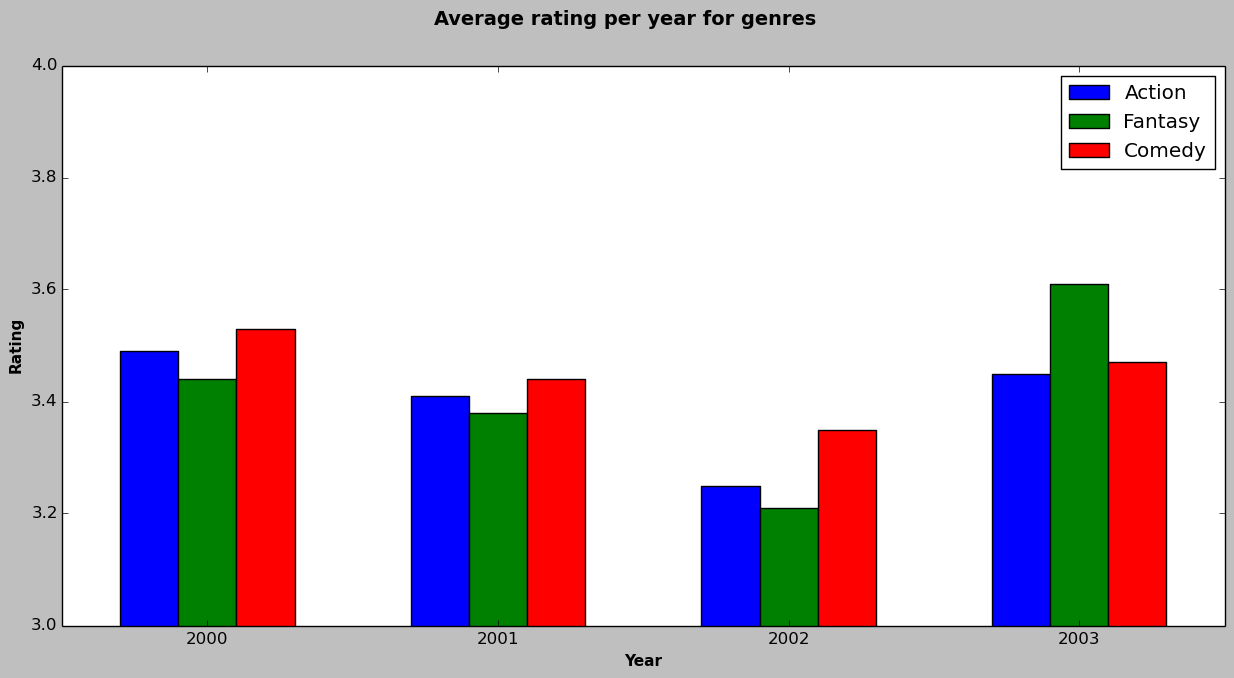

In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import collections

def get_all_movies_per_genre(genre1, genre2, genre3):
    movieID_list1 = list()
    movieID_list2 = list()
    movieID_list3 = list()
    for genres in data:
        vals = genres.split('::')
        if genre1 in vals[2]:
            movieID_list1.append(vals[0])
        if genre2 in vals[2]:
            movieID_list2.append(vals[0])
        if genre3 in vals[2]:
            movieID_list3.append(vals[0])
    movieID_list1.sort()
    movieID_list2.sort()
    movieID_list3.sort()
    
    arrayID = {}
    arrayID[0] = movieID_list1
    arrayID[1] = movieID_list2
    arrayID[2] = movieID_list3
    return arrayID
   

def convert_timestamp(arrayID):
    movieID_list1 = arrayID[0]
    movieID_list2 = arrayID[1]
    movieID_list3 = arrayID[2]
    
    year_list1 = list()
    year_list2 = list()
    year_list3 = list()
    
    
    for timestamp in ratings:
        vals = timestamp.split('::')
        if vals[1] in movieID_list1:
            if not datetime.datetime.fromtimestamp(
            int(vals[3])).strftime('%Y') in year_list1:
                year_list1.append(datetime.datetime.fromtimestamp(
                int(vals[3])).strftime('%Y'))
        if vals[1] in movieID_list2:
            if not datetime.datetime.fromtimestamp(
            int(vals[3])).strftime('%Y') in year_list2:
                year_list2.append(datetime.datetime.fromtimestamp(
                int(vals[3])).strftime('%Y'))
        if vals[1] in movieID_list3:
            if not datetime.datetime.fromtimestamp(
            int(vals[3])).strftime('%Y') in year_list3:
                year_list3.append(datetime.datetime.fromtimestamp(
                int(vals[3])).strftime('%Y'))
    year_array = {}
    year_array[0] = year_list1
    year_array[1] = year_list2
    year_array[2] = year_list3
    return year_array


def calculate_avg_genre(year_list, movieID_list):
    res = {}
    i = 0
    sum = 0
 
    for year in year_list:
        for movie in ratings:
            vals = movie.split('::')
            if vals[1] in movieID_list:
                if datetime.datetime.fromtimestamp(
                int(vals[3])).strftime('%Y') == year: 
                    i += 1
                    sum +=  float(vals[2])
                    res[year] = float(round((sum/i), 2))
        sum = 0
        i=0
    return res
    

def avg_rating_genre_per_year(year_array, arrayID):
    res1 = calculate_avg_genre(year_array[0], arrayID[0])
    res2 = calculate_avg_genre(year_array[1], arrayID[1])
    res3 = calculate_avg_genre(year_array[2], arrayID[2])
    print res1
    print res2
    print res3
    
    ind = np.arange(4)
#range(len(od3))
    od1 = collections.OrderedDict(sorted(res1.items()))
    od2 = collections.OrderedDict(sorted(res2.items()))
    od3 = collections.OrderedDict(sorted(res3.items()))
    
    plt.figure(figsize=(15,7))
    b1 = plt.bar(ind - 0.2, od1.values(), align="center", color = "b", width = 0.2, label="Action")
    b2 = plt.bar(ind, od2.values(), align="center", color = "g", width = 0.2, label="Fantasy")
    b3 = plt.bar(ind + 0.2, od3.values(), align="center", color = "r", width = 0.2, label="Comedy")
    plt.xticks(range(len(od1)), list(od1.keys()))
    #plt.yticks(range(6))
    plt.xlabel('Year', fontsize=11, fontweight='bold')
    plt.ylabel('Rating', fontsize=11, fontweight='bold')
    plt.suptitle('Average rating per year for genres', fontsize=14, fontweight='bold')
    plt.ylim(3.0,4.0)
    plt.legend()
    plt.show()
  

arrayID = get_all_movies_per_genre("Action", "Fantasy", "Comedy")
avg_rating_genre_per_year(convert_timestamp(arrayID), arrayID)

In [3]:
from IPython.display import HTML        
        
input_form = """
<div style="background-color:white; border: 1px solid black; width:300px; padding:20px;">
Genre: <input type="text" id="genre1"><br>
Genre: <input type="text" id="genre2"><br>
Genre: <input type="text" id="genre3"><br>
<button onclick="set_value()" style="margin-top:20px" align="center">Geef gemiddelde rating</button>
</div>
"""

javascript = """
<script type="text/Javascript">
    function set_value(){
        var vgenre1 = document.getElementById('genre1').value;
        var vgenre2 = document.getElementById('genre2').value;
        var vgenre3 = document.getElementById('genre3').value;
        var kernel = IPython.notebook.kernel;
        kernel.execute("genre1 = '" + vgenre1 + "'","genre2 = '" + vgenre2 + "'","genre3 = '" + vgenre3 + "'");
        IPython.notebook.execute_all_cells();
    }
</script>
"""

HTML(input_form + javascript)

In [4]:
print genre1

NameError: name 'genre1' is not defined